## Demo JNotebook for git

In [1]:
from data_view import *
from sklearn import datasets 

from jupyterthemes import jtplot
jtplot.style(context='notebook', ticks=True, grid=False)

In [2]:
iris = datasets.load_iris()

In [3]:
X = iris.data  # we only take the first two features.
y = pd.Series(iris.target).map(lambda x: iris.target_names[int(x)])

In [4]:
iris = pd.DataFrame(X, columns=iris.feature_names)
iris['group'] = y

Размер данных: (150, 5)

Обзор первых/последних строк данных
----------------------------------------------------------------------------------------------------


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),group
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica



Типы данных и кол-во непустых строк
----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
group                150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


""



Наличие дат (месяц, год, день) или id в названиях столбцов
----------------------------------------------------------------------------------------------------


,Текущий тип,Рекомендуемый тип
Имя,,
sepal width (cm),float64,int
petal width (cm),float64,int



Кол-во пропусков в данных
----------------------------------------------------------------------------------------------------


,Пропуски,"Пропуски, %"
Имя,,
sepal length (cm),0,0
sepal width (cm),0,0
petal length (cm),0,0
petal width (cm),0,0
group,0,0



Кол-во дубликатов в данных
----------------------------------------------------------------------------------------------------
1

Описательные статистики числовых признаков
----------------------------------------------------------------------------------------------------


,count,mean,std,min,25%,50%,75%,max,number_of_outliers
sepal length (cm),150,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9,0
sepal width (cm),150,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4,4
petal length (cm),150,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9,0
petal width (cm),150,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5,0



Гистограммы числовых показателей
----------------------------------------------------------------------------------------------------


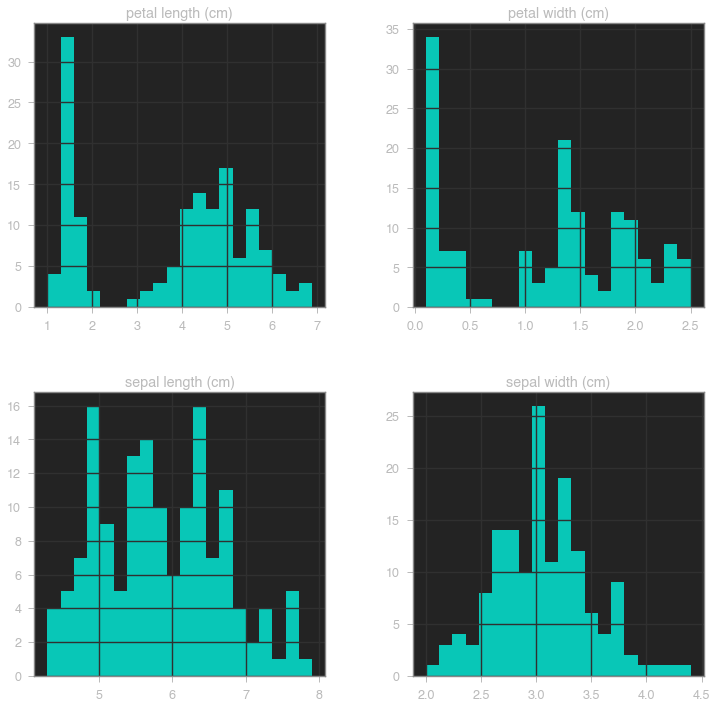


Описательные статистики категориальных признаков
----------------------------------------------------------------------------------------------------


,count,unique,top,freq
group,150,3,setosa,50




Топ-5 уникального категориального признака
----------------------------------------------------------------------------------------------------


,group_name,group_count
0,setosa,50
1,versicolor,50
2,virginica,50
3,0,-1
4,0,-1




Статистики при группировке по некоторым категориям
----------------------------------------------------------------------------------------------------
Группировка по: group


,petal length (cm),petal width (cm),sepal length (cm),sepal width (cm)
group,,,,
setosa,50,50,50,50
versicolor,50,50,50,50
virginica,50,50,50,50




Матрица корреляций
----------------------------------------------------------------------------------------------------


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1,-0.11757,0.871754,0.817941
sepal width (cm),-0.11757,1,-0.42844,-0.366126
petal length (cm),0.871754,-0.42844,1,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1




Список корреляций больших 0.7


,Признак 1,Признак 2,r
11,petal length (cm),petal width (cm),0.962865
2,sepal length (cm),petal length (cm),0.871754
3,sepal length (cm),petal width (cm),0.817941


In [7]:
view(iris, only_numeric=False)

## Paired scatterplots

In [8]:
import seaborn as sns
from itertools import combinations

Пара признаков: sepal length (cm)-sepal width (cm)


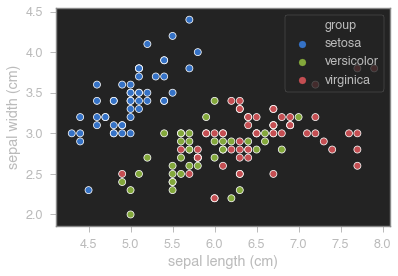

Пара признаков: sepal length (cm)-petal length (cm)


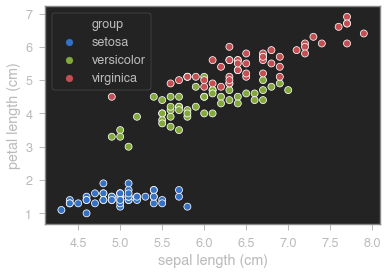

Пара признаков: sepal length (cm)-petal width (cm)


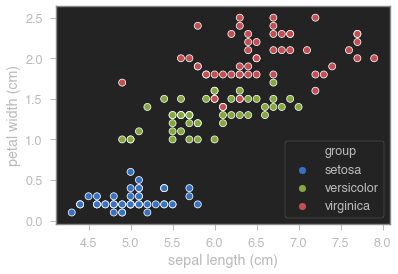

Пара признаков: sepal width (cm)-petal length (cm)


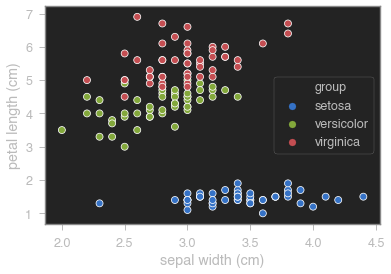

Пара признаков: sepal width (cm)-petal width (cm)


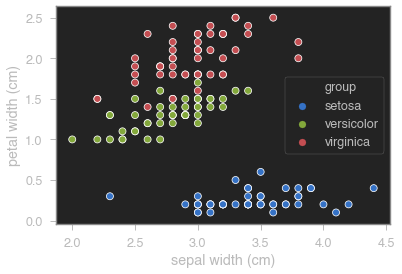

Пара признаков: petal length (cm)-petal width (cm)


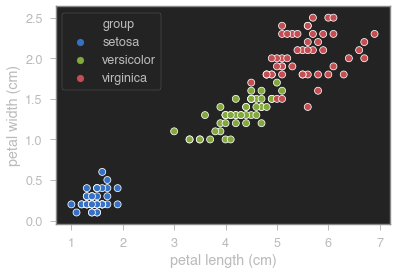

In [9]:
for pair in combinations(iris.drop('group', axis=1).columns, 2):
    print(f'\033[1mПара признаков:\033[0m {"-".join(pair)}')
    sns.scatterplot(x=pair[0], y=pair[1], hue='group', data=iris)
    plt.show()

## Save into json

In [10]:
iris.to_json('iris.json')

-------

## ML Scenario

### Evristic

 - if `petal length` < 2.5 and `petal width` < 0.75 -> setosa
 - if `petal length` > 2.5 and `petal width` > 1.55 -> virginica
 - if `petal length` > 2.5 and `petal width` < 1.55 -> versicolor

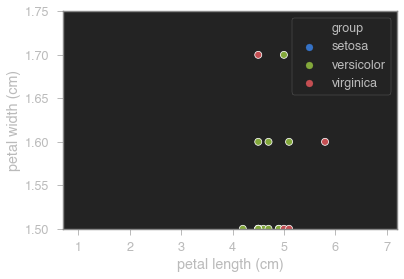

In [11]:
sns.scatterplot(x=pair[0], y=pair[1], hue='group', data=iris)
plt.ylim((1.5, 1.75))
plt.show()

In [12]:
# encoding group
group_dict = {
    'setosa':1,
    'virginica':2,
    'versicolor':3
}

In [13]:
iris['target'] = iris['group'].map(group_dict)

In [14]:
# Super-puper ML function
def make_ml(row):
    if row['petal length (cm)'] < 2.5 and row['petal width (cm)'] < 0.75:
        return 1
    if row['petal length (cm)'] > 2.5 and row['petal width (cm)'] > 1.55:
        return 2
    if row['petal length (cm)'] > 2.5 and row['petal width (cm)'] < 1.55:
        return 3

In [15]:
# Make ML
iris['pred'] = iris.apply(make_ml, axis=1)

In [16]:
# Score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [17]:
accuracy_score(iris['target'], iris['pred'])

0.9466666666666667

In [18]:
precision_score(iris['target'], iris['pred'], average='macro')

0.9471153846153846

In [19]:
recall_score(iris['target'], iris['pred'], average='macro')

0.9466666666666667

In [20]:
f1_score(iris['target'], iris['pred'], average='macro')

0.9466453247965854

## Save results into json

In [21]:
iris.to_json('iris.json')

## IPython Widgets

In [22]:
iris.drop(['group', 'pred'], axis=1).head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [23]:
# function for widgets
def make_ml(row, pl, pw, k=0, b=0):
    if k == 0:
        b = pw
    if row['petal length (cm)'] < pl and row['petal width (cm)'] < pw:
        return 1
    if row['petal length (cm)'] > pl and row['petal width (cm)'] > k * row['petal length (cm)'] + b:
        return 2
    if row['petal length (cm)'] > pl and row['petal width (cm)'] <= k * row['petal length (cm)'] + b:
        return 3

In [24]:
%matplotlib inline
from functools import partial
import ipywidgets as ipw
from ipywidgets import interact, interactive, fixed, interact_manual
import matplotlib.pyplot as plt

In [25]:
f1_score_widgets = ipw.FloatText(
    value=0.0,
    description='F1 Score',
    disabled=False
)

In [29]:
@interact(petal_length=(iris['petal length (cm)'].min(), iris['petal length (cm)'].max(), 0.05), 
          petal_width=(iris['petal width (cm)'].min(), iris['petal width (cm)'].max(), 0.05),
         k=(-10, 10, 0.05), b=(-5, 5, 0.025))
def f(petal_length=iris['petal length (cm)'].mean(), petal_width=iris['petal width (cm)'].mean(),
     k=-0.5, b=4.03):
    plt.figure(figsize=(8, 8))
    sns.scatterplot(x='petal length (cm)', y='petal width (cm)', hue='group', data=iris)
    plt.axhline(petal_width, linestyle='--', color='b')
    plt.axvline(petal_length, linestyle='--', color='y')
    # Make ML
    f = partial(make_ml, pl=petal_length, pw=petal_width, k=k, b=b)
    iris['pred'] = iris.apply(f, axis=1)
    #sns.scatterplot(x='petal length (cm)', y='petal width (cm)', hue='pred', data=iris)
    try:
        print(f"F1 score: {f1_score(iris['target'], iris['pred'], average='macro')}")
        f1_score_widgets.value = round(f1_score(iris['target'], iris['pred'], average='macro'), 3)
    except:
        pass
    
    x = np.linspace(iris['petal length (cm)'].min(), iris['petal length (cm)'].max(), num=1000)
    plt.plot(x, k * x + b, color='g', linestyle='-.')
    plt.ylim((iris['petal width (cm)'].min()-0.1, iris['petal width (cm)'].max()+0.1))
    plt.grid(True)
    plt.show()

interactive(children=(FloatSlider(value=3.7580000000000027, description='petal_length', max=6.9, min=1.0, step…

In [27]:
f1_score_widgets

FloatText(value=0.0, description='F1 Score')